## Tải dữ liệu


Thực hiện phân tích khám phá dữ liệu (EDA) trên tập dữ liệu "train.csv".


In [3]:
import pandas as pd

df = pd.read_csv('../data/train.csv')
test_df=pd.read_csv('../data/test.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Khám phá dữ liệu ban đầu

Hiển thị thông tin cơ bản về dữ liệu như kích thước, kiểu dữ liệu, và các giá trị thiếu.


In [5]:
print(df.shape)
print(test_df.shape)

df.info()
test_df.info()

(891, 12)
(418, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    i

## Thống kê mô tả


Tính toán các thống kê mô tả cho các cột số và cột phân loại.


In [6]:
print("Thống kê mô tả cho các cột số:")
display(df.describe())

print("\nThống kê mô tả cho các cột phân loại:")
display(df.describe(include='object'))

Thống kê mô tả cho các cột số:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



Thống kê mô tả cho các cột phân loại:


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


## Trực quan hóa dữ liệu




### Số lượng người sống sót

In [7]:
# Đếm số lượng người sống sót và không sống sót
survival_counts = df['Survived'].value_counts()

print("Số lượng người không sống sót (0):", survival_counts[0])
print("Số lượng người sống sót (1):", survival_counts[1])


Số lượng người không sống sót (0): 549
Số lượng người sống sót (1): 342


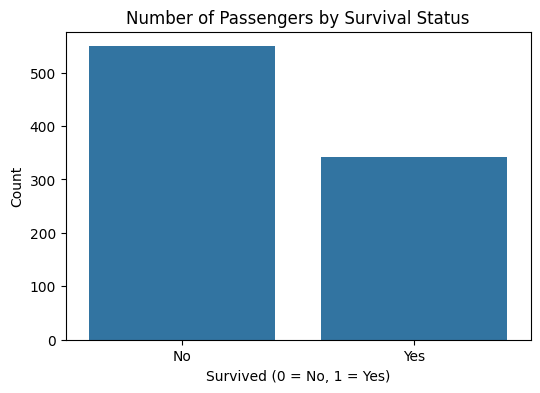

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=df)
plt.title('Number of Passengers by Survival Status')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

**Nhận xét về Phân bố Sống sót:**

Tỷ lệ sống sót chung trong tập dữ liệu là **38.38%**, cho thấy số lượng hành khách tử vong ($61.62\%$) nhiều hơn đáng kể. Mối quan hệ không cân bằng này là điều cần lưu ý. Mục tiêu của mô hình không chỉ là dự đoán chính xác mà còn là tránh thiên vị (bias) quá mức về lớp đa số (tử vong), mặc dù trong bài toán này, độ chính xác (Accuracy) vẫn là thước đo chính của Kaggle.

### Phân bố Age theo trạng thái sống sốt

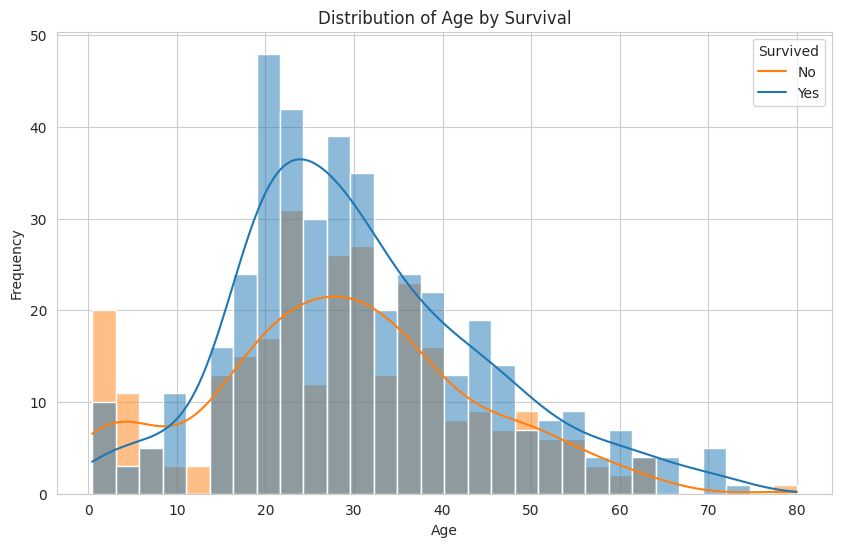

In [13]:
# Set plot style
sns.set_style('whitegrid')

# 1. Histogram for Age vs Survived
plt.figure(figsize=(10, 6))
sns.histplot(data=df.dropna(subset=['Age', 'Survived']), x='Age', hue='Survived', bins=30, kde=True)
plt.title('Distribution of Age by Survival')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

**Nhận xét và Giải thích về `Age`:**

Biểu đồ phân bố tuổi chỉ ra một sự khác biệt rõ rệt: **Trẻ em (dưới 10 tuổi)** có đỉnh sống sót cao hơn hẳn, điều này hoàn toàn phù hợp với chính sách "trẻ em trước" đã được áp dụng. Ngược lại, đỉnh tử vong cao nhất tập trung ở nhóm tuổi **20-35**, đây là nhóm chiếm số lượng lớn nhất và chủ yếu là nam giới Hạng ba. Mối tương quan này khẳng định rằng `Age` cần được giữ lại và thậm chí được biến đổi thành các biến phân loại (ví dụ: `Child`, `Young Adult`, `Senior`) để mô hình hóa tốt hơn các ngưỡng tuổi có tỷ lệ sống sót khác nhau.

### Tỷ lệ sống sốt theo kích thước gia đình

/tmp/ipython-input-268140133.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='FamilySize', y='Survived', data=df, palette='Set2')


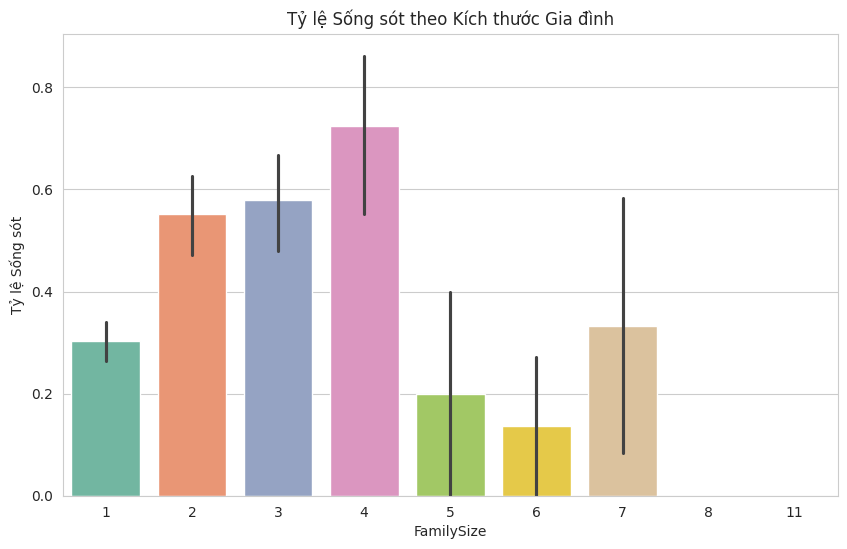

In [14]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Trực quan hóa tỷ lệ sống sót theo FamilySize
plt.figure(figsize=(10, 6))
sns.barplot(x='FamilySize', y='Survived', data=df, palette='Set2')
plt.title('Tỷ lệ Sống sót theo Kích thước Gia đình')
plt.ylabel('Tỷ lệ Sống sót')
plt.show()

**Nhận xét và Giải thích về `FamilySize`:**

Việc kết hợp `SibSp` và `Parch` thành `FamilySize` mang lại cái nhìn sâu sắc hơn so với việc phân tích từng biến riêng lẻ.

1.  **Người đi một mình (FamilySize=1):** Có tỷ lệ sống sót thấp hơn mức trung bình. Có lẽ những người này ít được ưu tiên cứu giúp hoặc thiếu sự hỗ trợ trong hỗn loạn.
2.  **Gia đình nhỏ (FamilySize=2, 3, 4):** Nhóm này có tỷ lệ sống sót cao nhất. Điều này có ý nghĩa, vì việc sơ tán một gia đình nhỏ (ví dụ: vợ chồng, hoặc vợ chồng và một con) dễ dàng hơn, và các thành viên có động lực bảo vệ nhau.
3.  **Gia đình lớn (FamilySize $\geq 5$):** Tỷ lệ sống sót giảm mạnh. Sơ tán một gia đình quá đông đúc (ví dụ: 6, 7, 8 người) trở nên cực kỳ khó khăn trong điều kiện thiếu xuồng cứu sinh và thời gian hạn chế, dẫn đến việc phải ưu tiên cho các nhóm nhỏ hơn.

Điều này gợi ý rằng, thay vì dùng `SibSp` và `Parch`, việc tạo ra biến **`IsAlone`** (nhị phân, $1$ nếu $FamilySize=1$) hoặc phân loại `FamilySize` thành các nhóm (Nhỏ, Vừa, Lớn) sẽ mang lại sức mạnh dự đoán cao hơn cho mô hình.

### Phân bố Pclass theo trạng thái sống sốt

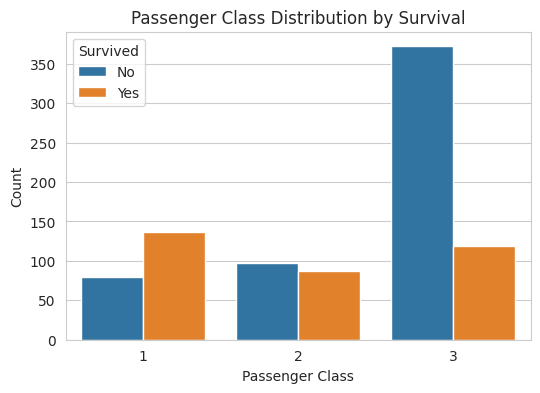

In [16]:
# 3. Bar plot for Pclass vs Survived
plt.figure(figsize=(6, 4))
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Passenger Class Distribution by Survival')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

**Nhận xét**:
- Hạng vé có ảnh hưởng rõ rệt đến khả năng sống sót trên tàu Titanic.

- Hành khách hạng nhất có cơ hội sống sót cao nhất, tiếp theo là hạng hai, trong khi hạng ba chịu thiệt hại nặng nề nhất.

- Biểu đồ phản ánh sự phân tầng xã hội rõ ràng trong quá trình cứu hộ – một yếu tố lịch sử đáng chú ý của thảm họa Titanic.

### Phân bố giới tính theo trạng thái sống sót

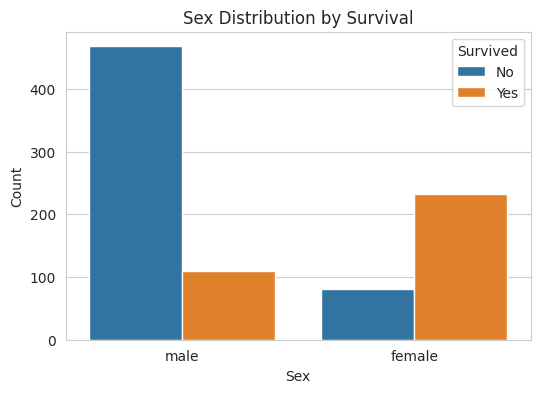

In [17]:
# Bar plot for Sex vs Survived
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Sex Distribution by Survival')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

**Tương tác:** Phân tích tương tác cho thấy **cả hai yếu tố đều quan trọng**. Ngay cả khi có đặc quyền về giới tính, nếu một người phụ nữ ở Hạng ba, tỷ lệ sống sót của họ vẫn thấp hơn đáng kể so với một người phụ nữ ở Hạng nhất. Điều này cho thấy **vị trí và tầng lớp xã hội** có ảnh hưởng đến mức độ ưu tiên sơ tán, ngay cả trong cùng một nhóm giới tính.

### Phân bố cảng theo trạng thái sống sót

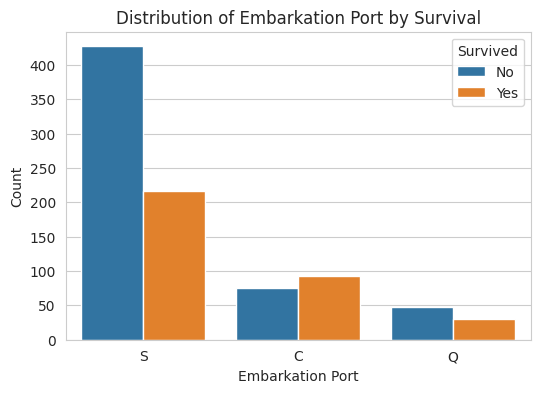

In [18]:
# 5. Bar plot for Embarked by Survival
plt.figure(figsize=(6, 4))
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title('Distribution of Embarkation Port by Survival')
plt.xlabel('Embarkation Port')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

- Cảng S chiếm phần lớn số hành khách nhưng có tỉ lệ tử vong cao.

- Cảng C tuy có ít hành khách hơn nhưng tỉ lệ sống sót cao hơn rõ rệt.

- Cảng Q có quy mô nhỏ và tỉ lệ sống sót trung bình thấp.

**Nhận xét** Biểu đồ cho thấy nguồn gốc cảng lên tàu có mối liên hệ nhất định với khả năng sống sót, có thể do sự khác biệt về điều kiện kinh tế và hạng vé của hành khách tại từng cảng.

### Phân bố giá vé theo trạng thái sống sót

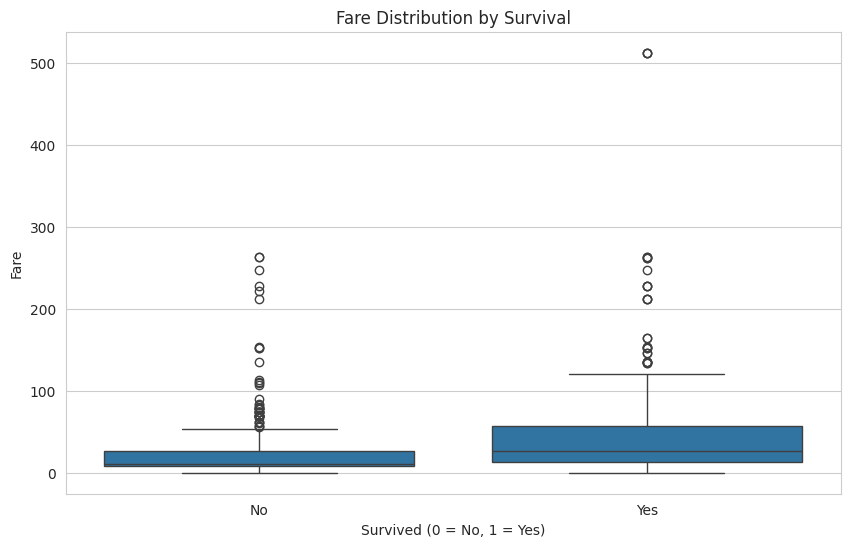

In [19]:
# Box plot for Fare vs Survived
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Fare Distribution by Survival')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Fare')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

Mức giá vé trung vị (median) của nhóm sống sót cao hơn đáng kể so với nhóm không sống sót.
→ Cho thấy hành khách trả giá vé cao (thường thuộc hạng vé cao hơn) có cơ hội sống sót lớn hơn.

Khoảng giá vé (IQR) của nhóm sống sót rộng hơn, thể hiện sự đa dạng về điều kiện kinh tế trong nhóm này:

Có người mua vé giá thấp (hạng thấp),

Nhưng cũng có người trả giá rất cao (hạng nhất hoặc hạng sang).

Các giá trị ngoại lai (outliers) xuất hiện ở cả hai nhóm, đặc biệt là một số hành khách sống sót với giá vé cực cao (>500) — có thể là các hành khách hạng nhất.

Nhóm không sống sót tập trung nhiều ở mức giá thấp, hầu hết dưới 50 đơn vị tiền tệ, phản ánh đa số thuộc hạng vé thấp.

**Nhận xét** : 
- Có mối tương quan rõ rệt giữa giá vé và khả năng sống sót:
Hành khách có vé đắt hơn thường có tỉ lệ sống sót cao hơn, có thể do họ thuộc tầng lớp giàu, vị trí phòng thuận lợi và được ưu tiên sơ tán.

- Biểu đồ cho thấy sự phân tầng xã hội rõ rệt trên tàu Titanic ảnh hưởng đến kết cục sinh tồn của hành khách.

## Kiểm tra giá trị thiếu



In [20]:
missing_values = df.isnull().sum()
print("Số lượng giá trị thiếu trong mỗi cột:")
print(missing_values)

Số lượng giá trị thiếu trong mỗi cột:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
FamilySize       0
dtype: int64


## Kiểm tra tương quan




In [21]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate the correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Display the correlation matrix
display(correlation_matrix)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,-0.040143
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.016639
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.065997
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.301914
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.890712
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,0.783111
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.217138
FamilySize,-0.040143,0.016639,0.065997,-0.301914,0.890712,0.783111,0.217138,1.000000


## Ma trận tương quan

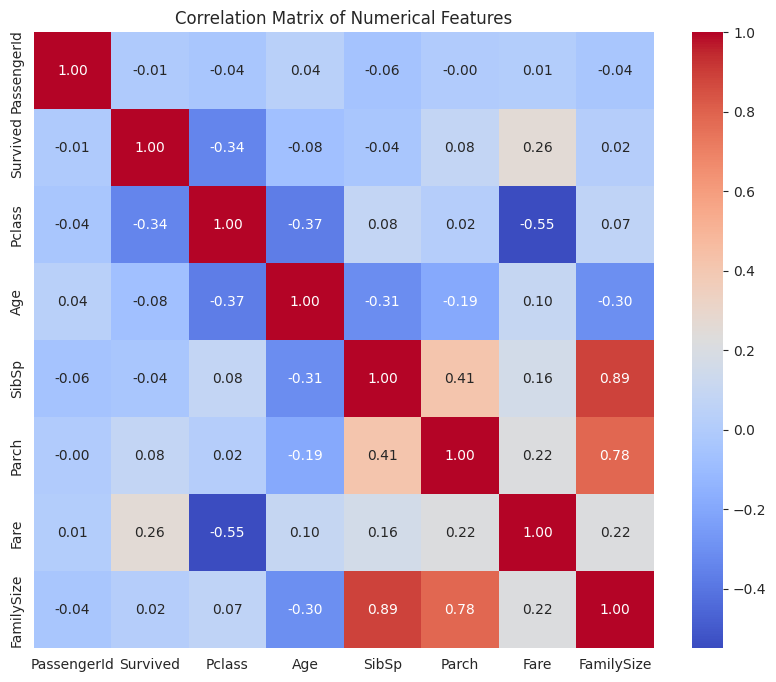

In [22]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()